# COVID-19 death rate and case rate by state

Note: The population of the Navajo Nation from 2014 to 2018, [according to the U.S. Census Bureau](https://www.census.gov/tribal/?aianihh=2430) was 172,875 ±2,223.

### Live data basis
- [U.S.](https://github.com/nytimes/covid-19-data/blob/master/live/us.csv)
- [Utah](https://coronavirus.utah.gov/case-counts/)
- [Navajo Nation](https://navajo-nation-coronavirus-response-ndoh-nec.hub.arcgis.com) ([secondary](https://www.ndoh.navajo-nsn.gov/COVID-19))
    - [raw](https://services7.arcgis.com/9dF9awxpVpgKyoYk/arcgis/rest/services/SA/FeatureServer/0/query?f=json&where=1%3D1&outFields=*&returnGeometry=false&outStatistics=%5B%7B%22onStatisticField%22%3A%22Total%22%2C%22outStatisticFieldName%22%3A%22Total_sum%22%2C%22statisticType%22%3A%22sum%22%7D%5D)
- [Grand County](https://www.seuhealth.com/covid-19)
- [San Juan County](https://coronavirus.utah.gov/case-counts/)
- [other states](https://github.com/nytimes/covid-19-data/raw/master/live/us-states.csv)

### Historic data basis
- [U.S.](https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv)
- [Utah](https://covidtracking.com/data/state/utah#historical)
- [Navajo Nation (according to Navajo Times)](https://navajotimes.com/coronavirus-updates/covid-19-across-the-navajo-nation/)
- [Navajo Nation (according to the plug)](https://web.archive.org/web/*/http://www.ndoh.navajo-nsn.gov/COVID-19)
- [Navajo Nation (archival)](https://www.ndoh.navajo-nsn.gov/COVID-19/News-Update)
- [Grand County](https://mail.google.com/mail/u/0/#search/bgarff%40utah.gov+%22COVID-19+Update%22)
- [San Juan County](https://covidtracking.com/data/state/utah#historical)
- [other states](https://github.com/nytimes/covid-19-data/raw/master/us-states.csv)

### Historic data sources
- U.S.: https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv
- Utah: `./COVID-19 history/Utah.csv`
- Navajo Nation: `./COVID-19 history/Navajo Nation.csv`
- Grand County: `./COVID-19 history/Grand County.csv`
- San Juan County: `./COVID-19 history/San Juan County.csv`
- other states: https://github.com/nytimes/covid-19-data/raw/master/live/us-states.csv

# The important stuff
Pitch the ball to yourself by throwing it straight up in the air:

In [1]:
import requests
import re
import bs4
import pandas
import matplotlib.pyplot
import dateutil.parser

Match the plotting DPI to the screen resolution of my MacBook Pro:

In [2]:
matplotlib.pyplot.rcParams["figure.dpi"] = 227

Get all the data:

In [3]:
live_state_covid_data = pandas.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/live/us-states.csv")
historic_navajo_data = pandas.read_csv("./COVID-19 history/Navajo Nation.csv")
population_data = pandas.read_csv("./U.S. state populations (plus Navajo Nation).csv", thousands = r',')

live_state_covid_data.set_index("state", inplace = True)
population_data.set_index("state, territory or area", inplace = True)

Combine the data:

In [4]:
navajo_row = pandas.DataFrame(
    {
        "cases": [historic_navajo_data.iloc[-1].at["cumulative cases"]],
        "deaths": [historic_navajo_data.iloc[-1].at["cumulative deaths"]],
    },
    index = ["Navajo Nation"],
)
combined_live_covid_data = live_state_covid_data.append(navajo_row)
pop_covid_data = combined_live_covid_data.join(
    population_data,
    how = "inner"
)
pop_covid_data = pop_covid_data.dropna(axis = 1)

Calculate some new rows:

In [5]:
def case_fatality_rate(row):
    if row.cases == 0:
        return 0
    else:
        return row.deaths/row.cases

def cases_per_capita(row):
    return row.cases/row.population

def deaths_per_capita(row):
    return row.deaths/row.population

pop_covid_data["case fatality rate"] = pop_covid_data.apply(
    case_fatality_rate,
    axis = 1,
)
pop_covid_data["cases per capita"] = pop_covid_data.apply(
    cases_per_capita,
    axis = 1,
)
pop_covid_data["deaths per capita"] = pop_covid_data.apply(
    deaths_per_capita,
    axis = 1,
)

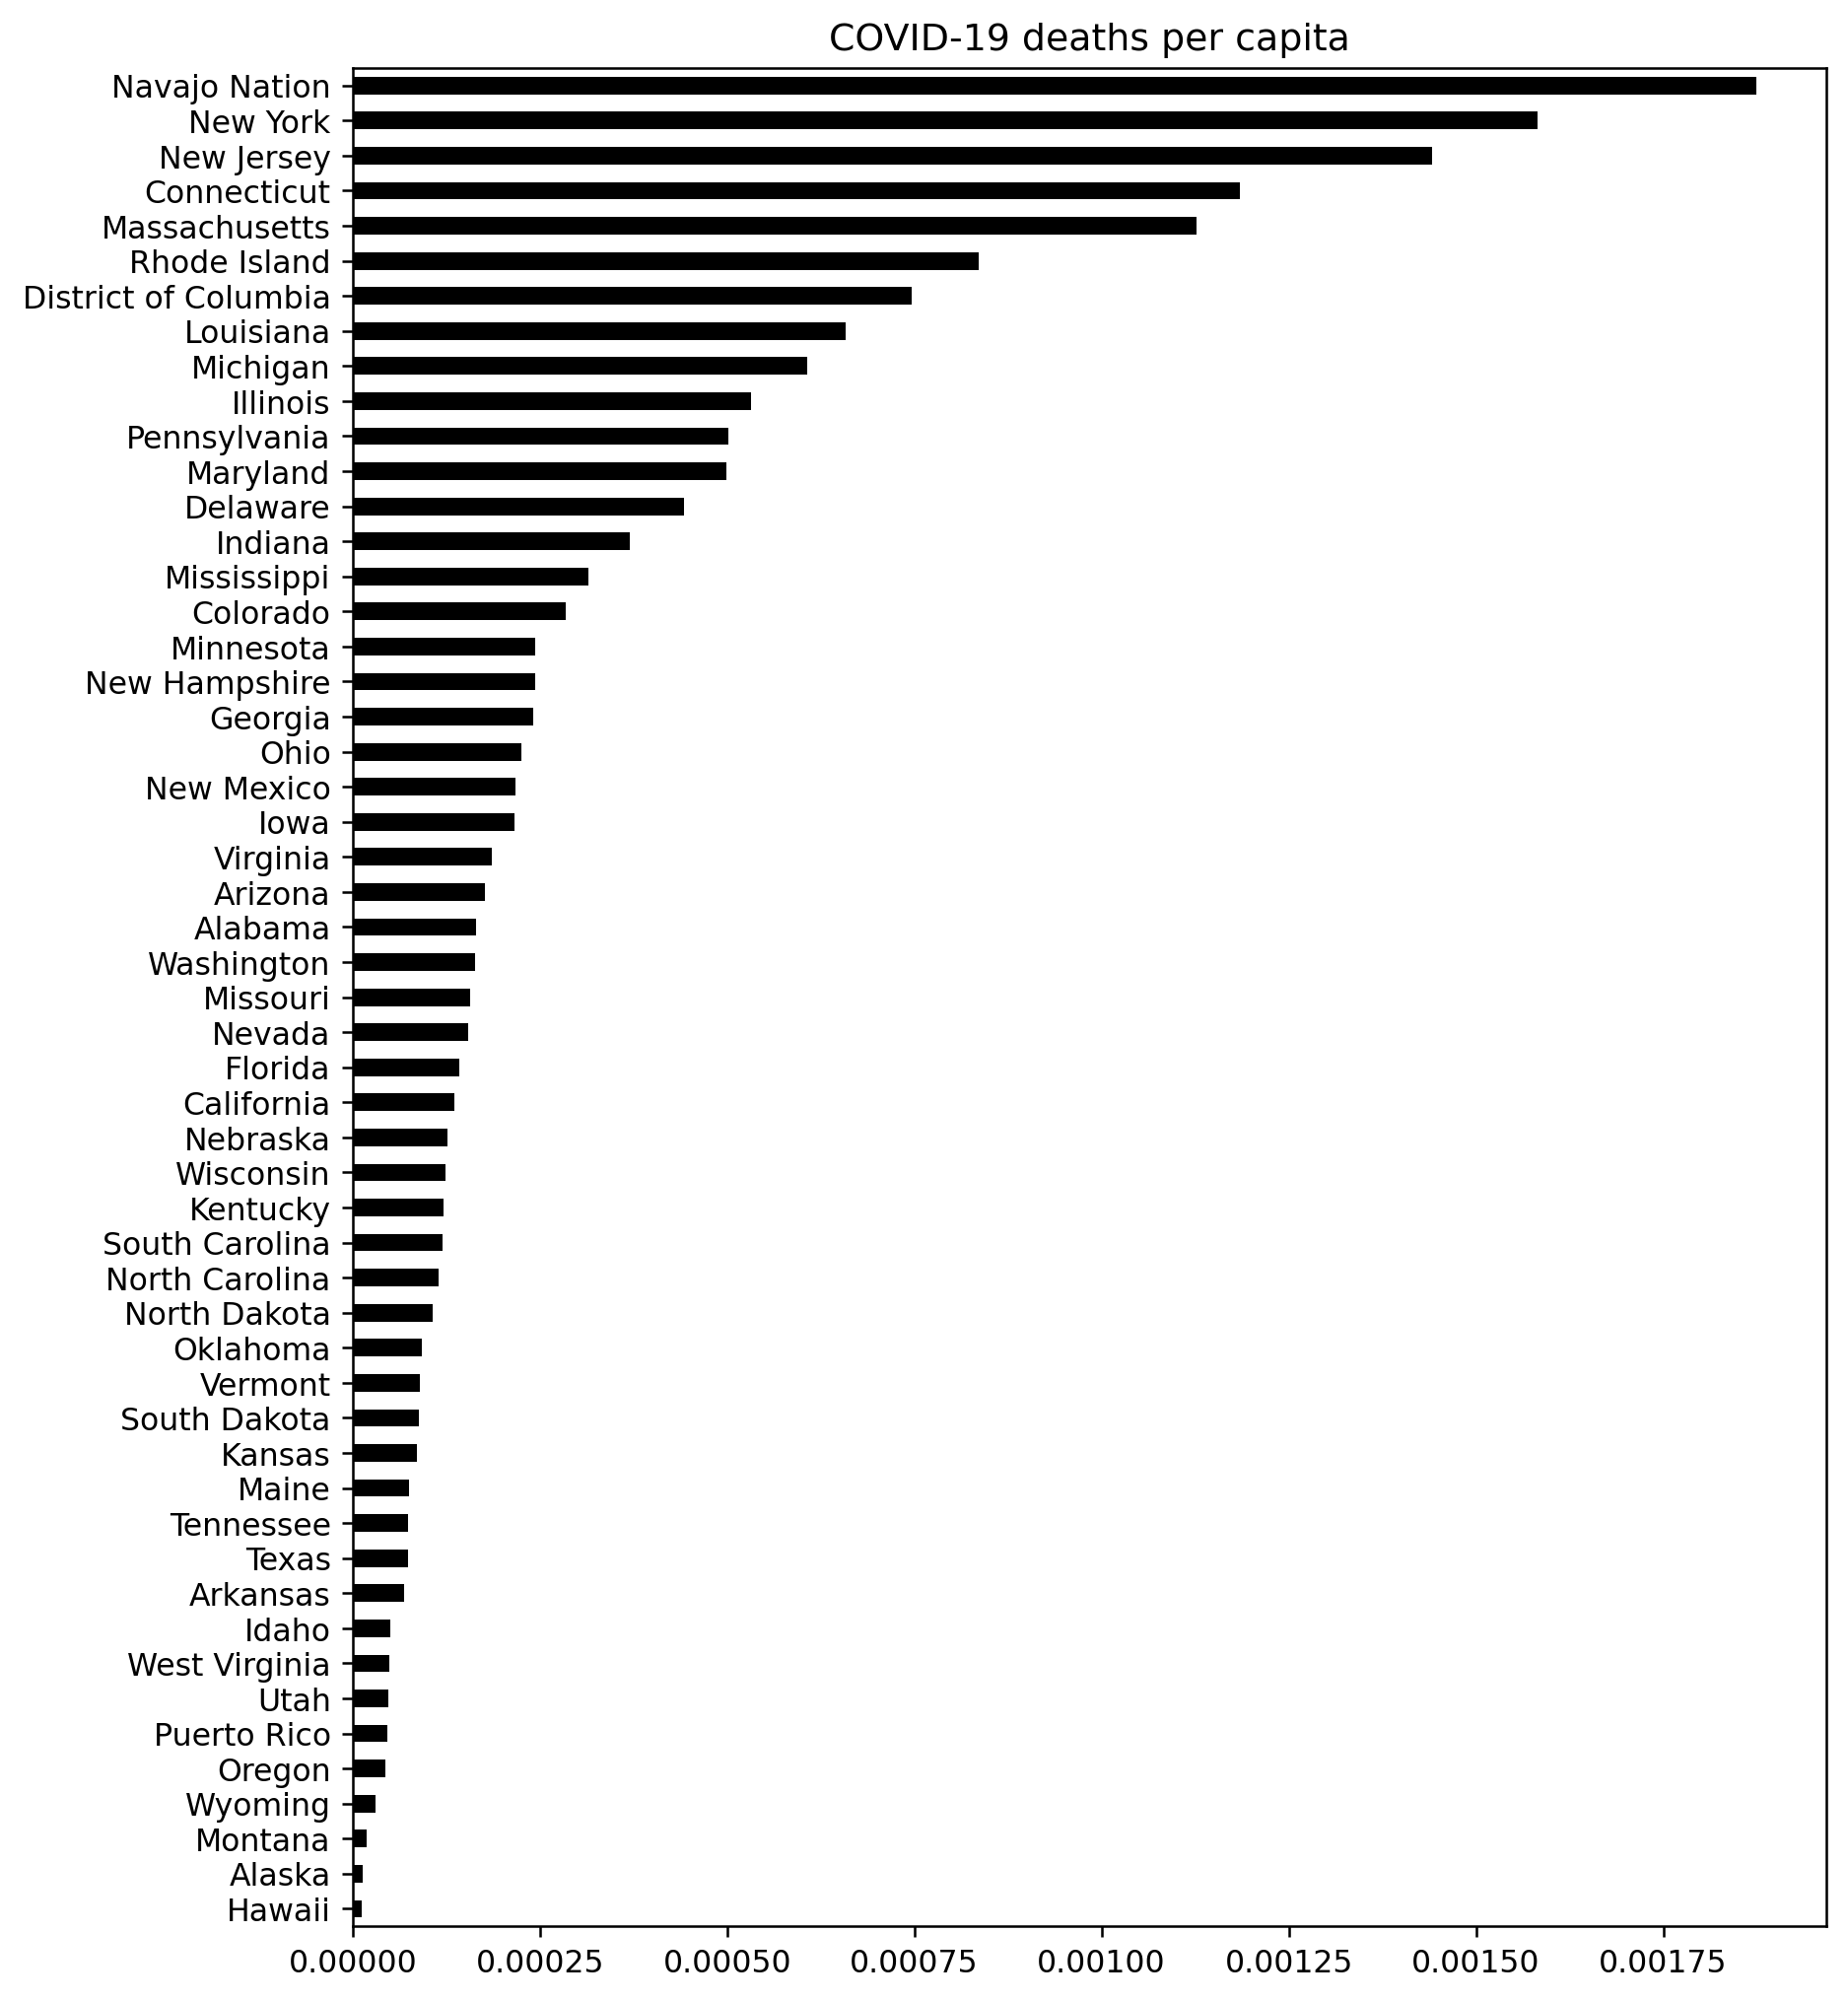

In [6]:
pop_covid_data.sort_values(
    "deaths per capita",
    inplace = True,
    ascending = False
)
axis = pop_covid_data.plot.barh(
    y = "deaths per capita",
    figsize = (8.5, 11),
    color = "black",
)
axis.invert_yaxis()
axis.get_legend().remove()
axis.set_title("COVID-19 deaths per capita")
matplotlib.pyplot.show()

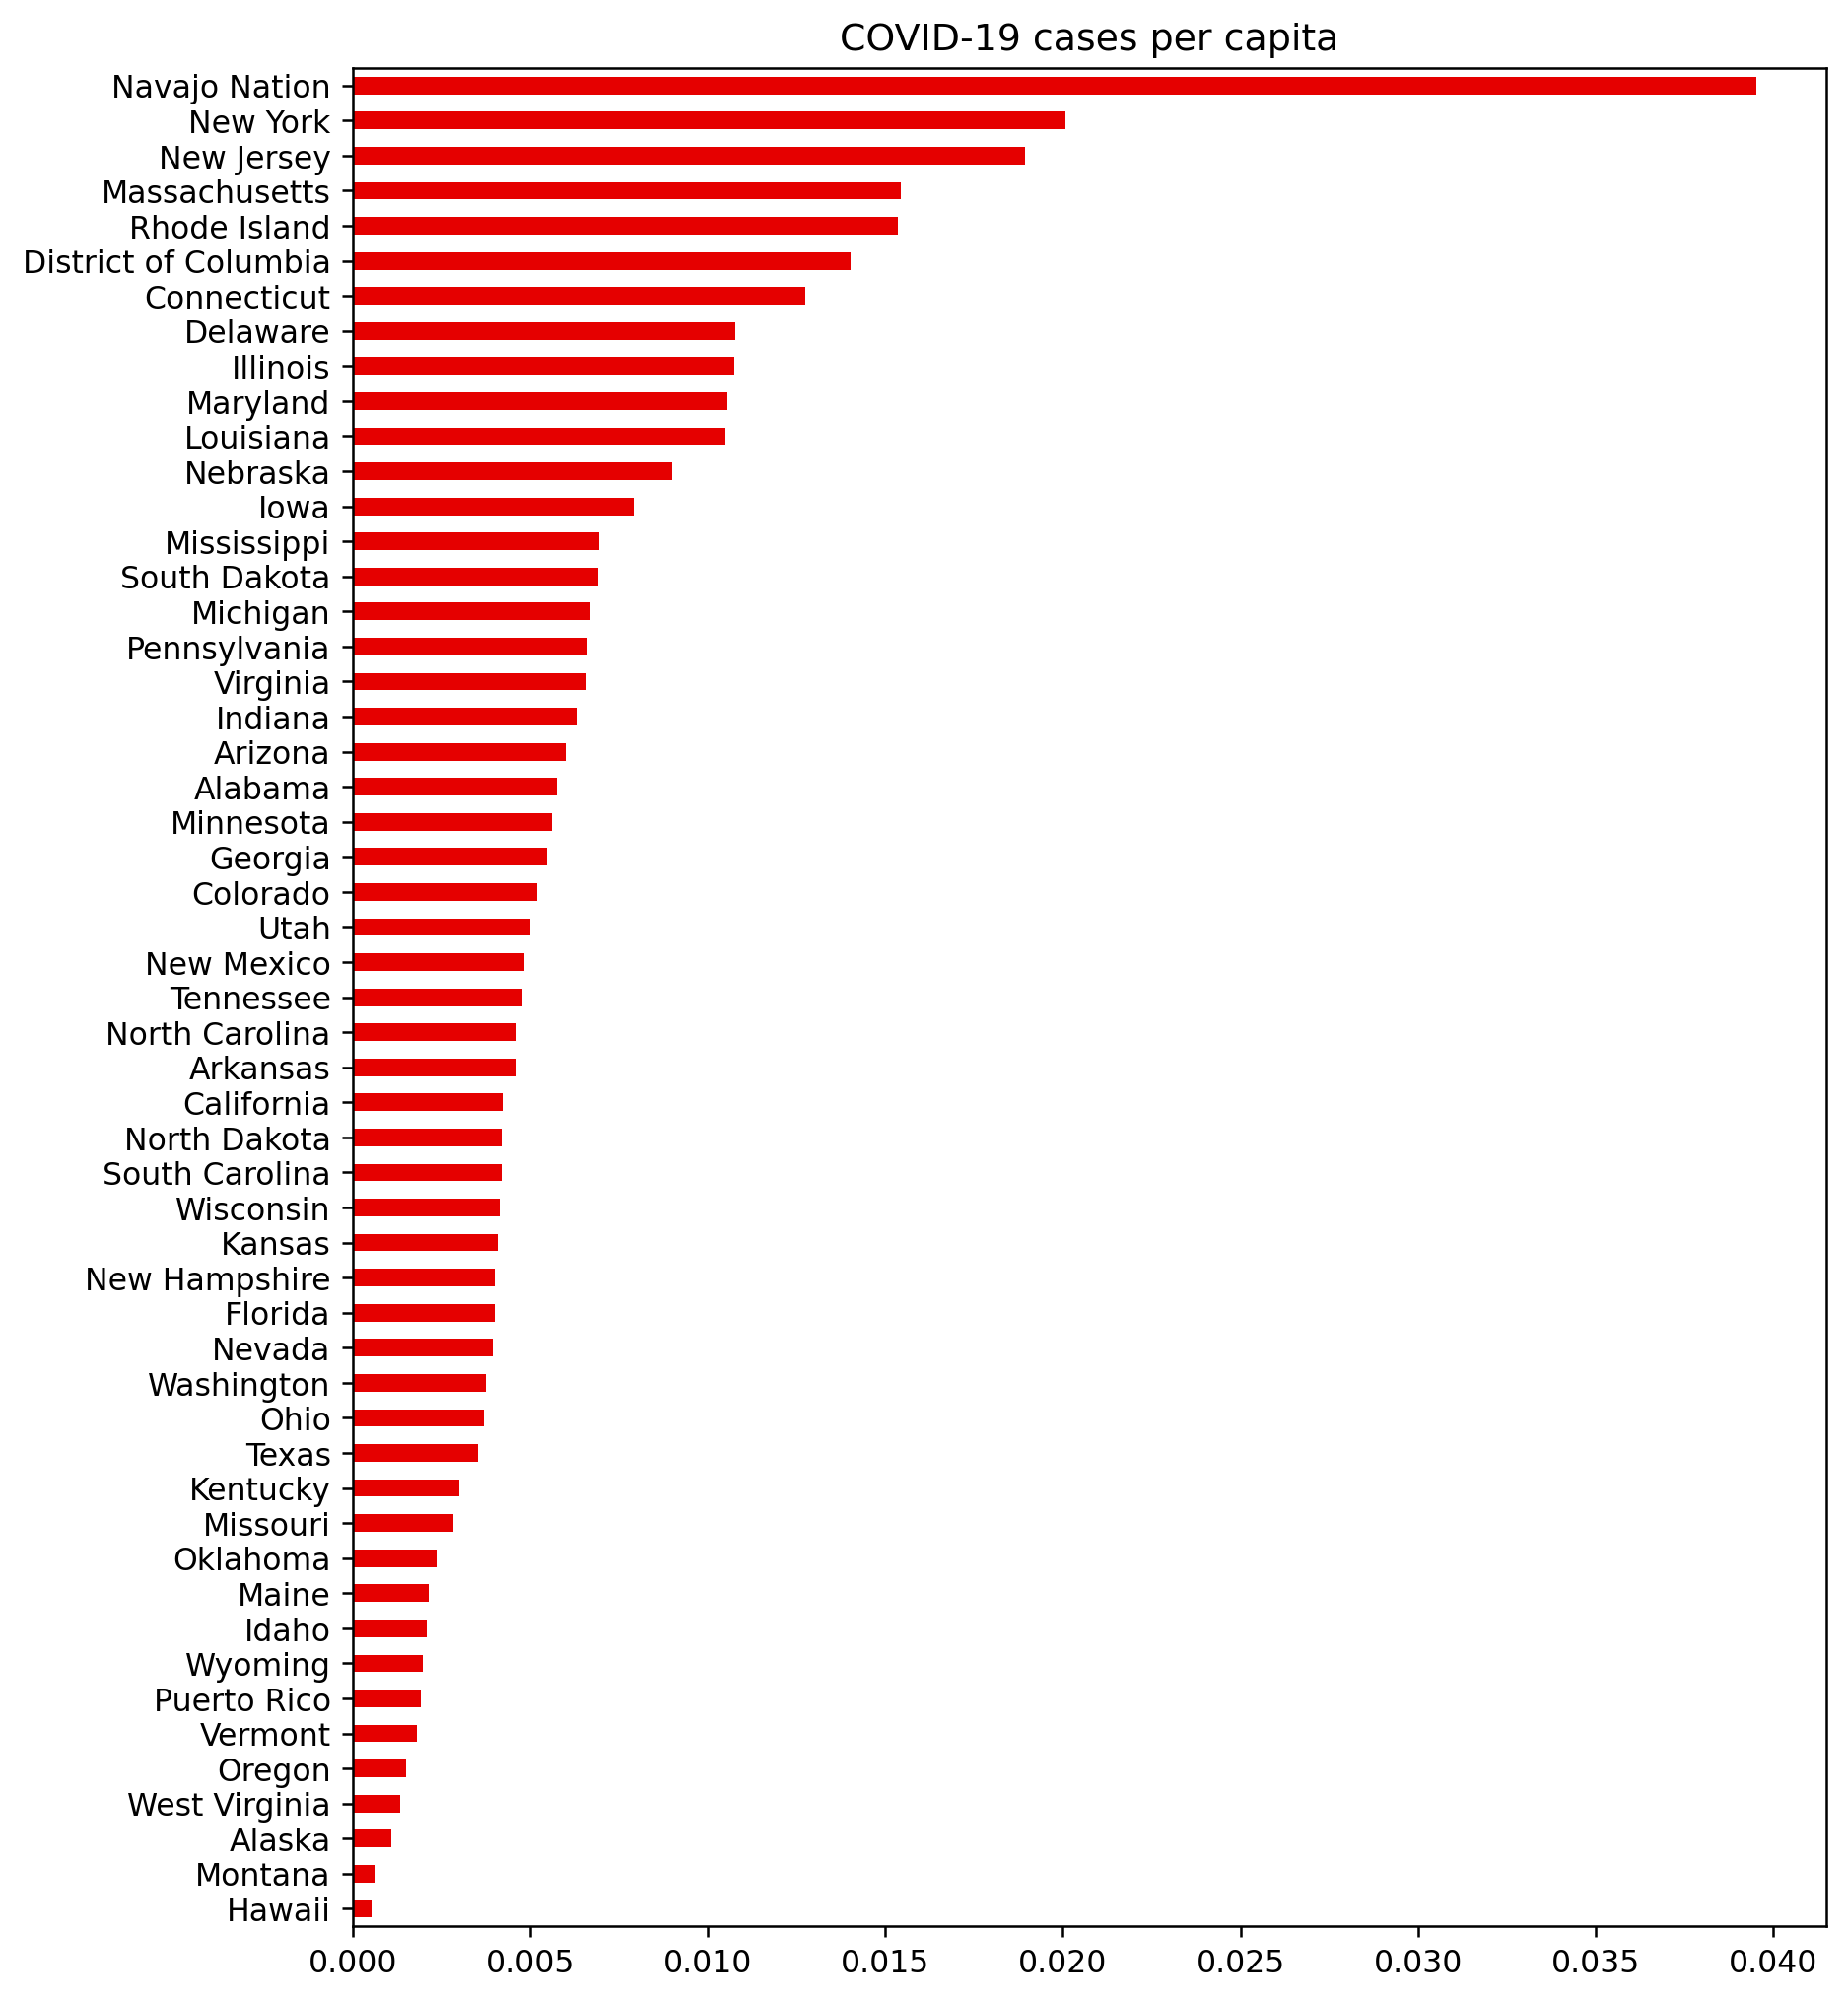

In [7]:
pop_covid_data.sort_values(
    "cases per capita",
    inplace = True,
    ascending = False
)
axis = pop_covid_data.plot.barh(
    y = "cases per capita",
    figsize = (8.5, 11),
    color = "xkcd:red",
)
axis.invert_yaxis()
axis.get_legend().remove()
axis.set_title("COVID-19 cases per capita")
matplotlib.pyplot.show()